# **Prophet Model From Facebook to be used in time Series Analysis**

- # **Facebook Model**

In [176]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# warning 
import warnings
warnings.filterwarnings('ignore')

In [216]:
# import the data 

df = pd.read_csv('DailyDelhiClimateTrain.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [179]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [180]:
df.shape

(1462, 4)

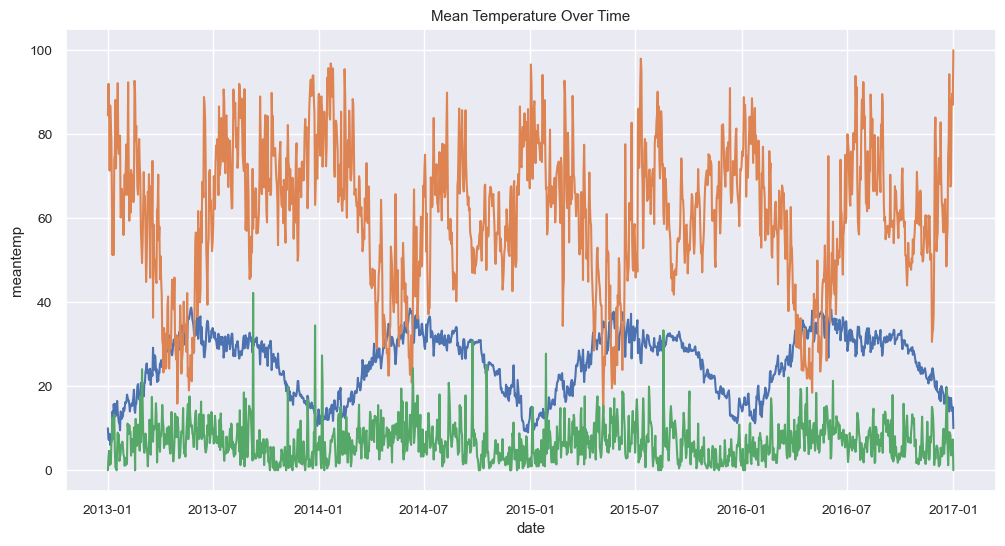

In [181]:
# draw a line plot 

sns.set(rc={'figure.figsize':(12,6)},font_scale=0.9, style='darkgrid')



sns.lineplot(data=df, x='date', y='meantemp')
sns.lineplot(data=df, x='date', y='humidity')
sns.lineplot(data=df, x='date', y='wind_speed')
# sns.lineplot(data=df, x='date', y='meanpressure')
plt.title('Mean Temperature Over Time')

plt.show()

In [182]:
df.columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [183]:
#interplolate the outlier from meanpressure column on 28 mar 2016

df.loc['2016-03-28','meanpressure'] = np.nan
df['meanpressure'] = df['meanpressure'].interpolate(meatho='time')
df.loc['2016-03-28']
#check if it works:

meantemp          25.933333
humidity          52.800000
wind_speed         6.546667
meanpressure    1012.062500
Name: 2016-03-28 00:00:00, dtype: float64

In [184]:
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [185]:
# draw same plot in plotly 
fig = px.line(df, x=df.index, y='meanpressure', title='Mean Temperature Over Time')
fig.show()

In [186]:
fig = px.line(df,x=df.index,y='humidity', title='Mean Humidity Over Time',)
fig.show()

<Axes: xlabel='meantemp', ylabel='humidity'>

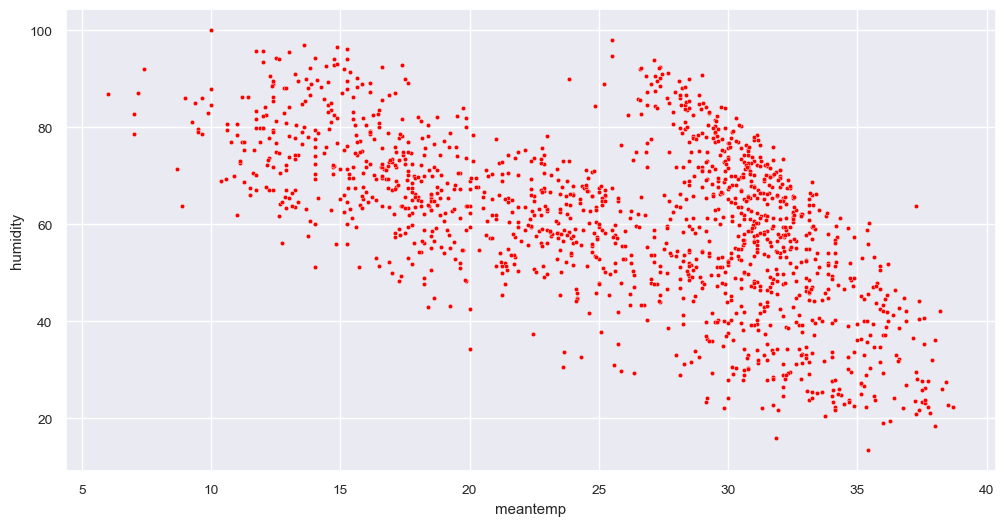

In [187]:
# make a scatter plot b/w meantemp and humidity 

sns.scatterplot(data=df, x='meantemp', y='humidity', s=10,  color='red')


In [188]:
fig = px.scatter(df, x='meantemp', y='humidity', title='Mean Temperature vs Humidity', trendline='ols', trendline_color_override='darkblue')
fig.show()


In [189]:
from scipy.stats import pearsonr

pearsonr(df['meantemp'], df['humidity'])
print('Correlation Coefficient:', pearsonr(df['meantemp'], df['humidity'])[0])
print('P-value:', pearsonr(df['meantemp'], df['humidity'])[1])

Correlation Coefficient: -0.5719507155817221
P-value: 8.965893710176129e-128


<Axes: >

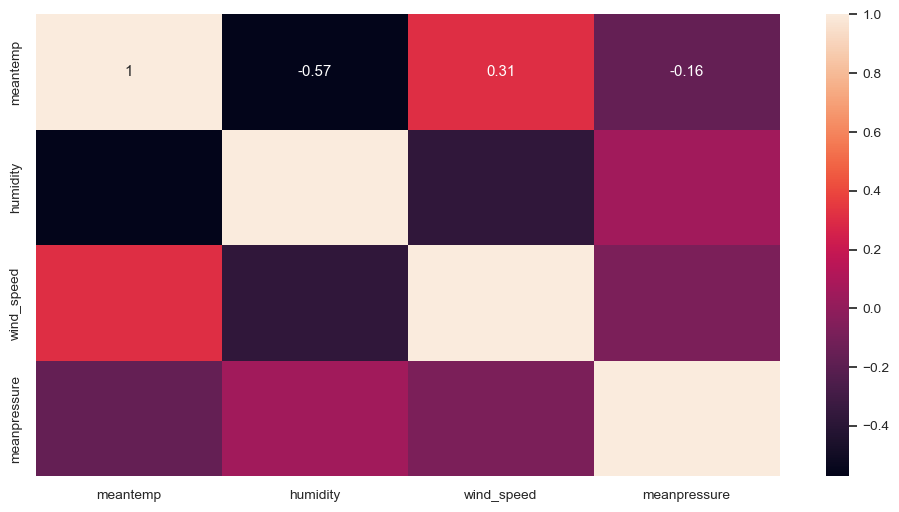

In [190]:
# make a heatmap 

sns.heatmap(df.corr(), annot=True)




In [191]:
# lets scale the data 

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)
df_scaled.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1.462000e+03,1.462000e+03,1.462000e+03,1.462000e+03
mean,-1.458022e-17,1.968330e-16,-1.944029e-16,-1.927019e-15
std,1.000342e+00,1.000342e+00,1.000342e+00,1.000342e+00
min,-2.654044e+00,-2.824109e+00,-1.491699e+00,-2.242730e+01
25%,-9.037230e-01,-6.201833e-01,-7.296443e-01,-1.102679e-01
50%,3.020541e-01,1.105528e-01,-1.273107e-01,4.485792e-02
75%,7.909894e-01,6.828386e-01,5.342114e-01,1.861053e-01
max,1.799551e+00,2.340044e+00,7.766988e+00,7.687749e+00


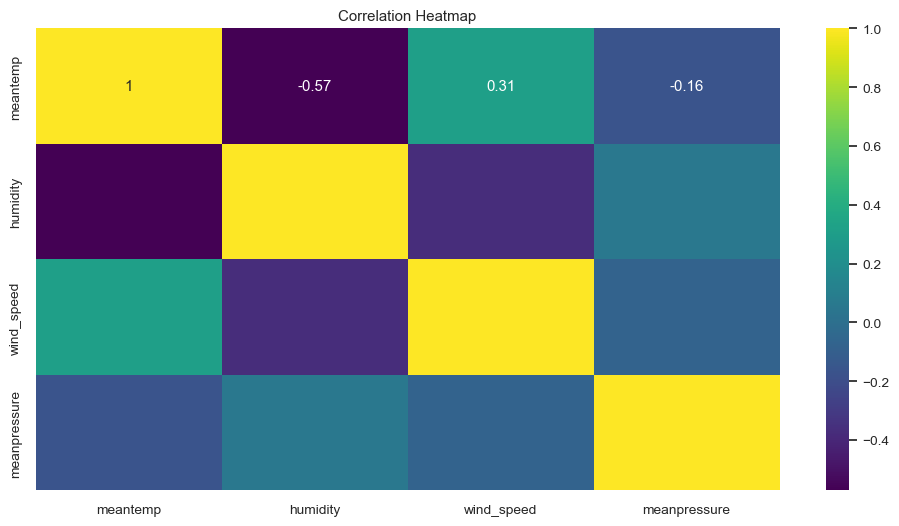

In [192]:
# make a correlation heatmap of scaled data 
sns.heatmap(df_scaled.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()
          

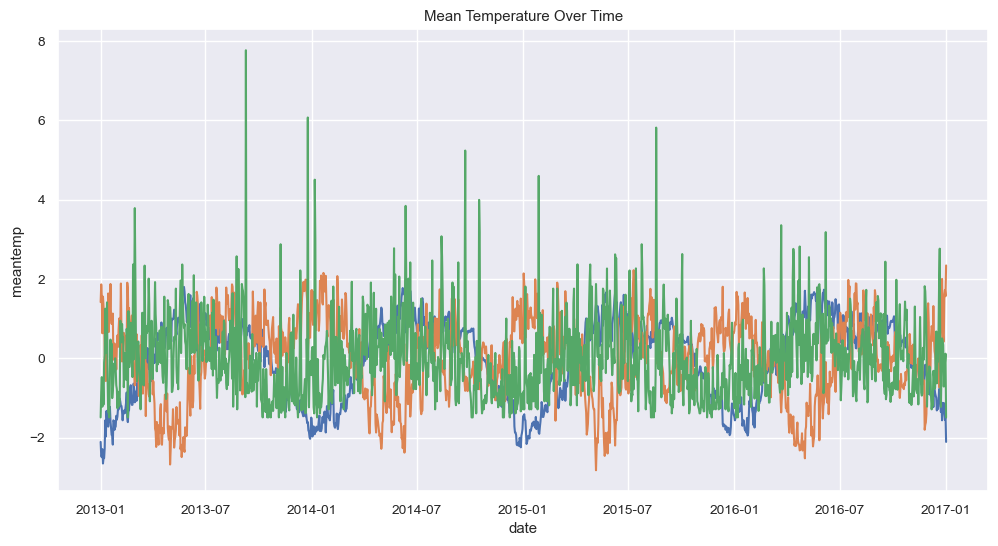

In [193]:
# draw a line plot 

sns.lineplot(data=df_scaled, x='date', y='meantemp')
sns.lineplot(data=df_scaled, x='date', y='humidity')
sns.lineplot(data=df_scaled, x='date', y='wind_speed')
# sns.lineplot(data=df_scaled, x='date', y='meanpressure')

plt.title('Mean Temperature Over Time')

plt.show()

In [195]:
# add a two columns in the dataset for month and year 
df['month'] = df.index.month
df['year'] = df.index.year
df.head()

,meantemp,humidity,wind_speed,meanpressure,month,year
date,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013
2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013
2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013
2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013


In [196]:
df_scaled.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,-2.109500,1.415439,-1.491699,0.202650
2013-01-02,-2.463454,1.862828,-0.838196,0.250041
2013-01-03,-2.495219,1.564569,-0.475626,0.269293
2013-01-04,-2.291015,0.630022,-1.221233,0.235972
2013-01-05,-2.654044,1.554627,-0.680303,0.221162


In [198]:
df_scaled['month'] = df.index.month
df_scaled['year'] = df.index.year
df.head()

,meantemp,humidity,wind_speed,meanpressure,month,year
date,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013
2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013
2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013
2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013


In [199]:
df_scaled.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [200]:
df_scaled.year.unique()

array([2013, 2014, 2015, 2016, 2017])

Text(0.5, 1.0, 'Mean Temperature Over Time')

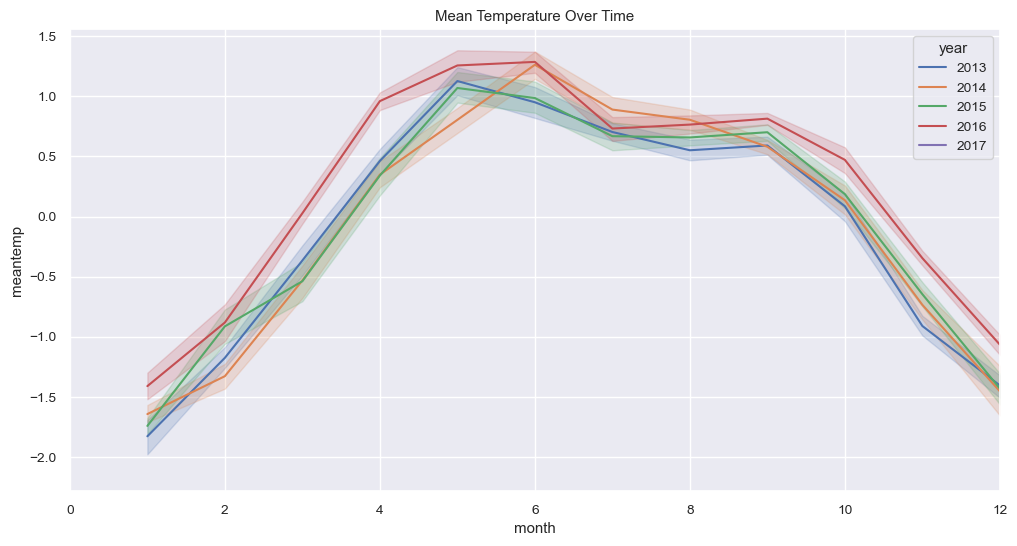

In [205]:
sns.lineplot(data=df_scaled, x='month', y='meantemp', hue='year' ,palette='deep')
plt.xlim(0,12)
plt.title('Mean Temperature Over Time')


In [209]:
# same plot in plotly

fig = px.line(df_scaled, x=df.index, y='meantemp', color='year', title='Mean Temperature Over Time')
fig.show()

In [210]:
fig = px.line(df, x=df.index, y='meantemp', color='year', title='Mean Temperature Over Time')
fig.show()


# **lets use the prophet model from python**

In [217]:

# rename the columns 
df = df.rename(columns={'date':'ds', 'meantemp':'y'})
df.head()


,ds,y,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [225]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# call the model 
model = Prophet()
# fit the data to the model
model.fit(df)
# make prediction 
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
plot_plotly(model, forecast)


15:15:10 - cmdstanpy - INFO - Chain [1] start processing
15:15:11 - cmdstanpy - INFO - Chain [1] done processing


In [227]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,24.689997,8.992626,14.434684,24.689997,24.689997,-12.939197,-12.939197,-12.939197,0.034058,0.034058,0.034058,-12.973255,-12.973255,-12.973255,0.0,0.0,0.0,11.750800
1,2013-01-02,24.690142,9.270090,14.492082,24.690142,24.690142,-12.803590,-12.803590,-12.803590,0.146275,0.146275,0.146275,-12.949865,-12.949865,-12.949865,0.0,0.0,0.0,11.886552
2,2013-01-03,24.690287,9.400747,14.291721,24.690287,24.690287,-12.844073,-12.844073,-12.844073,0.067163,0.067163,0.067163,-12.911235,-12.911235,-12.911235,0.0,0.0,0.0,11.846214
3,2013-01-04,24.690432,9.269108,14.435870,24.690432,24.690432,-12.831776,-12.831776,-12.831776,0.027535,0.027535,0.027535,-12.859310,-12.859310,-12.859310,0.0,0.0,0.0,11.858656
4,2013-01-05,24.690577,9.417100,14.641317,24.690577,24.690577,-12.865204,-12.865204,-12.865204,-0.069124,-0.069124,-0.069124,-12.796081,-12.796081,-12.796081,0.0,0.0,0.0,11.825373
